In [1]:
# http://selenium-python.readthedocs.io/getting-started.html
import time 
import re
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options as Chrome_Options
from selenium.webdriver import Firefox
from selenium.webdriver.firefox.options import Options as Firefox_Options
try:
    import Image
except ImportError:
    from PIL import Image
import pytesseract
import glob
import matplotlib, cv2
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
screenshots_dir = '../screenshots/'
selenium_path = '../selenium/'
driver_path = selenium_path + 'chromedriver'
adblock_path = selenium_path + 'adblock/1.500_0/'
video_url='https://youtu.be/Nf_pakPwZg0?t=37m58s'
data_path = "../screenshots/"

In [3]:
def show_img(img, gray=False):
    plt.figure(figsize=(10,10))
    if (gray):
        plt.imshow(img, 'gray')
    else:
        plt.imshow(img)
    plt.show()
        
def show_img_from_path(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    show_img(img, False)

In [4]:
def crop_announcement(img):
    return img[250:350,750:1800]

def sharpen(img):
    return cv2.addWeighted(img, 8, cv2.blur(img, (3, 3)), -8, 256)

In [5]:
ff_screenshot= '../screenshots/ff10.png'

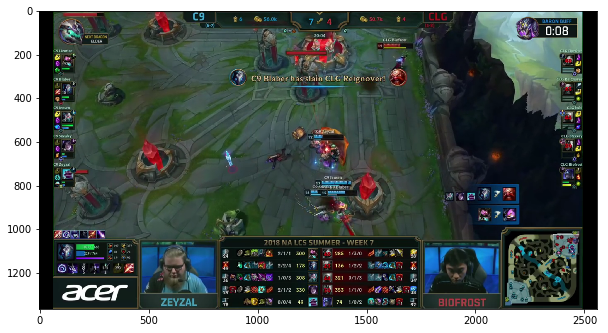

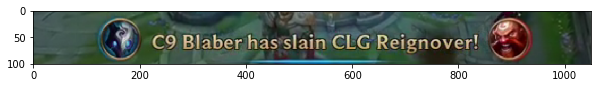

In [6]:
img = cv2.imread(ff_screenshot)
# show_img(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
show_img(img, False)
announcement = crop_announcement(img)
show_img(announcement)

In [75]:
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 3))
sqKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25,25))


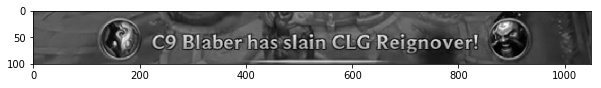

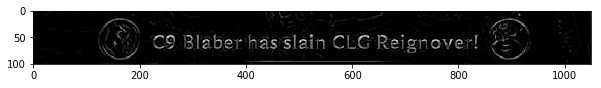

(100, 1050)


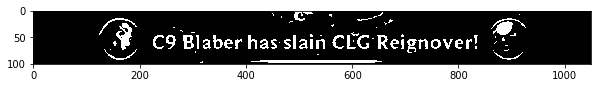

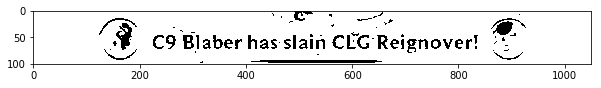

(100, 1050)
M199 g  
3 C9 Blaber hasslaih CLGVReignover! f
V L   V


In [16]:
gray = cv2.cvtColor(announcement, cv2.COLOR_BGR2GRAY)
show_img(gray, True)
# tophat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, sqKernel)
show_img(tophat, True)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
print(thresh.shape)
show_img(thresh, True)
# thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, sqKernel)
# sharpen = sharpen(thresh)
# show_img(sharpen, True)
imagem = cv2.bitwise_not(thresh)
show_img(imagem, True)
print(imagem.shape)
pil_img = Image.fromarray(imagem)
# print(pil_img.shape)
text = pytesseract.image_to_string(pil_img, config="-c tessedit_char_whitelist=!abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789 -psm 6")
print(text)

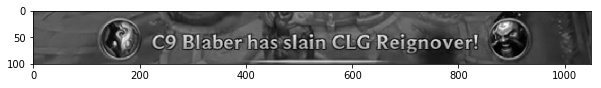

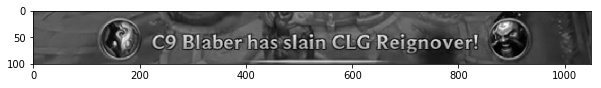

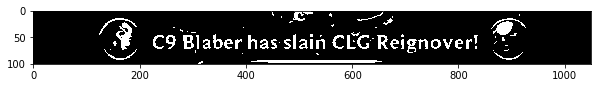

erode


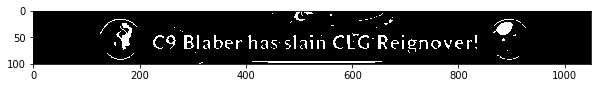

dilate


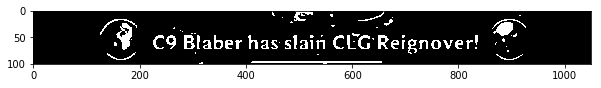

inv


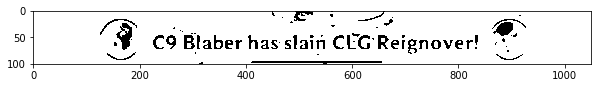

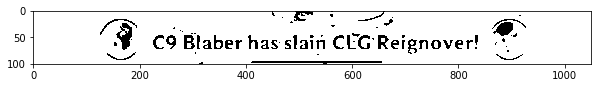

K  P z 11   
b       w j KOT
3 C9 Bilaber hasslaigi CLGReignover!


In [111]:
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 3))
# sqKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
sqKernel = np.ones((3,3),np.uint8)
img = cv2.cvtColor(announcement, cv2.COLOR_BGR2GRAY)
show_img(img, True)
# img = cv2.multiply(gray, 1.5)
show_img(img, True)
ret, img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
show_img(img, True)
kernel = np.ones((2, 2), np.uint8)
img = cv2.erode(img, kernel, iterations=1)
print('erode')
show_img(img, True)
img = cv2.dilate(img,kernel,iterations = 1)
print('dilate')
show_img(img, True)
# img = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, sqKernel)
# img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, sqKernel)
# img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, sqKernel)
# print('morph')
# show_img(img, True)
img = cv2.bitwise_not(img, True)
print('inv')
show_img(img, True)
pil_img = Image.fromarray(img)
show_img(img, True)
text = pytesseract.image_to_string(pil_img, config="-c tessedit_char_whitelist=!abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789 -psm 6")
print(text)
# ret2, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
# show_img(th2, True)
# ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# norm = cv2.normalize(tmp, tmp, 0, 255, cv2.NORM_MINMAX); 
# thresh = cv2.threshold(tmp, dst, 0, 255, cv2.CV_THRESH_OTSU);